In [12]:
import os
import shutil
import scipy.misc
import numpy as np
from collections import namedtuple


In [7]:
# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for you approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

name2label = { label.name : label for label in labels }

In [ ]:
import cv2

### Copy data

In [32]:
train_dir = 'data/leftImg8bit/'
train_dataset_dir = train_dir+'train_ds/'
train_dir += 'train'
os.makedirs(train_dataset_dir, exist_ok=True)

for dirname in os.listdir(train_dir):
    for fname in os.listdir(os.path.join(train_dir, dirname)):
        shutil.copy(os.path.join(train_dir, dirname, fname), os.path.join(train_dataset_dir, fname))

In [24]:
val_dir = 'data/leftImg8bit/'
val_dataset_dir = val_dir+'val_ds/'
val_dir += 'val'
os.makedirs(val_dataset_dir, exist_ok=True)

for dirname in os.listdir(val_dir):
    for fname in os.listdir(os.path.join(val_dir, dirname)):
        shutil.copy(os.path.join(val_dir, dirname, fname), os.path.join(val_dataset_dir, fname))

In [25]:
gt_dir = 'data/leftImg8bit/'
gt_dataset_dir = gt_dir+'gt_ds/'
gt_dir = 'data/gtFine/train/'
os.makedirs(gt_dataset_dir, exist_ok=True)


for dirname in os.listdir(gt_dir):
    for fname in os.listdir(os.path.join(gt_dir, dirname)):
        if 'color' in fname:
            shutil.copy(os.path.join(gt_dir, dirname, fname), os.path.join(gt_dataset_dir, fname))

In [33]:
for fname in os.listdir(train_dataset_dir):
    img = scipy.misc.imread(os.path.join(train_dataset_dir, fname))
    img = scipy.misc.imresize(img, (512, 1024), interp='bilinear')
    scipy.misc.imsave(os.path.join(train_dataset_dir, fname), img)

In [34]:
for fname in os.listdir(val_dataset_dir):
    img = scipy.misc.imread(os.path.join(val_dataset_dir, fname))
    img = scipy.misc.imresize(img, (512, 1024), interp='bilinear')
    scipy.misc.imsave(os.path.join(val_dataset_dir, fname), img)

In [35]:
for fname in os.listdir(gt_dataset_dir):
    img = scipy.misc.imread(os.path.join(gt_dataset_dir, fname))
    img = scipy.misc.imresize(img, (512, 1024), interp='nearest')
    scipy.misc.imsave(os.path.join(gt_dataset_dir, fname), img)

In [109]:
train_dir = 'data/leftImg8bit/'
train_dataset_dir = train_dir+'train_ds/'
val_dir = 'data/leftImg8bit/'
val_dataset_dir = val_dir+'val_ds/'
gt_dir = 'data/leftImg8bit/'
gt_dataset_dir = gt_dir+'gt_ds/'


for fname in os.listdir(train_dataset_dir):
    s = fname.split('_', 3)[3]
    os.rename(os.path.join(train_dataset_dir, fname),
              os.path.join(train_dataset_dir, fname[:-len(s1)-1]+'.png'))

              
for fname in os.listdir(val_dataset_dir):
    s = fname.split('_', 3)[3]
    os.rename(os.path.join(val_dataset_dir, fname),
              os.path.join(val_dataset_dir, fname[:-len(s1)-1]+'.png'))
              
for fname in os.listdir(gt_dataset_dir):
    s = fname.split('_', 3)[3]
    os.rename(os.path.join(gt_dataset_dir, fname),
              os.path.join(gt_dataset_dir, fname[:-len(s1)-1]+'.png'))

### Examine dataset

In [ ]:
import matplotlib.pyplot as plt

In [39]:
test_img = '/home/nike/dl/SDC/proj12/Semantic_Segmentation/data/leftImg8bit/train_ds/aachen_000005_000019_leftImg8bit.png'
gt_test_img = '/home/nike/dl/SDC/proj12/Semantic_Segmentation/data/leftImg8bit/gt_ds/aachen_000005_000019_gtFine_color.png'
img = scipy.misc.imread(test_img)
gt_img = scipy.misc.imread(gt_test_img)
img.shape

(512, 1024, 3)

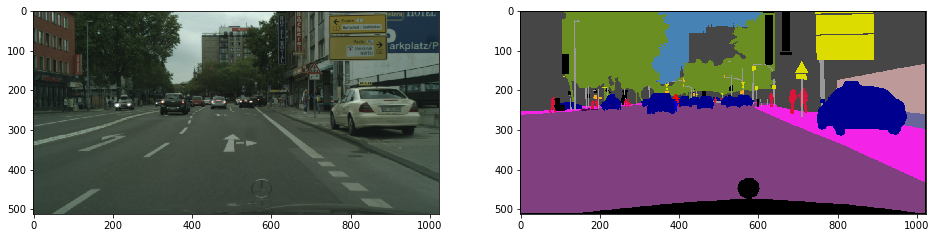

In [40]:

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(gt_img)
plt.show()

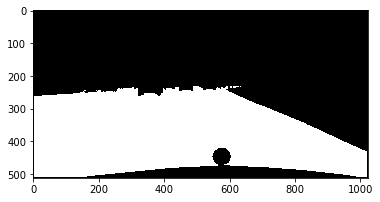

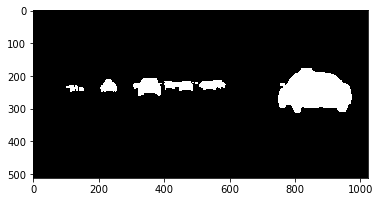

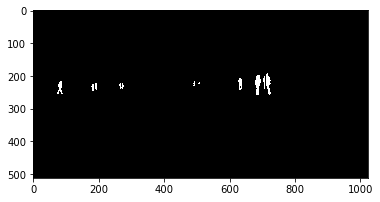

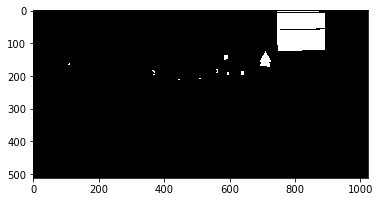

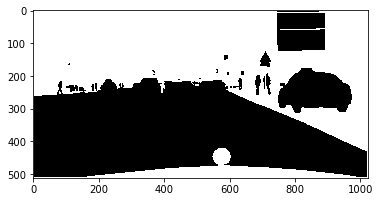

In [50]:
def showim(img):
    img_prep = np.concatenate((img, img, img), axis =2)
    plt.figure()
    plt.imshow(img_prep, cmap='gray')
    plt.show()

def showimg(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

road_color = np.array([128, 64, 128, 255])
car_color = np.array([0, 0, 142, 255])
human_color = np.array([220, 20, 60, 255])
sign_color = np.array([220, 220, 0, 255])
#list(gt_img[490, :, 0])
gt_road = np.all(gt_img == road_color, axis=2)
gt_road = gt_road.reshape(*gt_road.shape, 1)
gt_road_int = gt_road.astype(np.uint8)*255
showim(gt_road_int)

gt_car = np.all(gt_img == car_color, axis=2)
gt_car = gt_car.reshape(*gt_car.shape, 1)
gt_car_int = gt_car.astype(np.uint8)*255
showim(gt_car_int)

gt_human = np.all(gt_img == human_color, axis=2)
gt_human = gt_human.reshape(*gt_human.shape, 1)
gt_human_int = gt_human.astype(np.uint8)*255
showim(gt_human_int)

gt_sign = np.all(gt_img == sign_color, axis=2)
gt_sign = gt_sign.reshape(*gt_sign.shape, 1)
gt_sign_int = gt_sign.astype(np.uint8)*255
showim(gt_sign_int)

gt_obj = np.concatenate((gt_road, gt_car, gt_human, gt_sign),axis=2)
gt_bg = np.all(gt_obj == 0, axis=2)
gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
gt_bg_int = gt_bg.astype(np.uint8)*255

gt_bg_int.shape
showim(gt_bg_int)

1.020515905311258 8
255 14
255 22


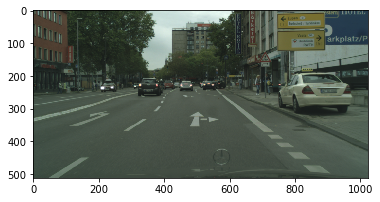

In [90]:
import random
def bc_img(img, s = 1.0, m = 0):
    img = img * s + m
    
    img[img > 255] = 255
    img[img < 0] = 0
    img = img.astype(np.uint8)
    return img 

contr = random.uniform(0.8, 1.2) # Contrast augmentation
bright = random.randint(-20, 20) # Brightness augmentation
image = bc_img(img, contr, bright)
print(contr, bright)
print(np.max(img), np.min(img))
print(np.max(image), np.min(image))
showimg(image)